In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import datetime
from glob import glob

In [2]:
dailyDf = pd.read_csv("../data/data/합천_댐기상종합_forTrain.csv", index_col=0)
dailyDf.index = pd.to_datetime(dailyDf.index)

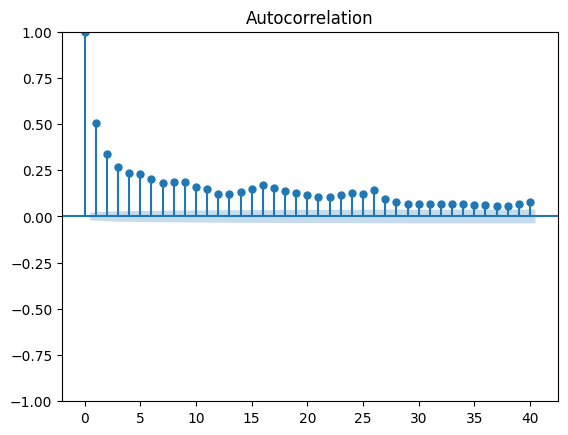

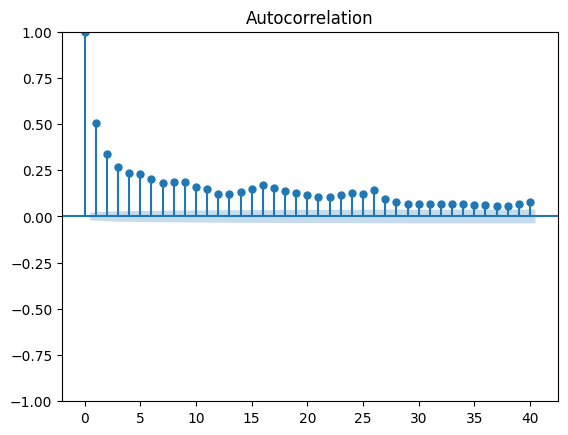

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dailyDf.당일유입량)

In [ ]:
plt.rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True

In [ ]:
dailyDf.columns

In [ ]:
sns.lineplot(dailyDf, x=dailyDf.index, y='sin_month')
sns.lineplot(dailyDf, x=dailyDf.index, y='cos_month')


In [ ]:

sns.lineplot(dailyDf, x=dailyDf.index, y='전일유입량')
# sns.lineplot(dailyDf, x='시간', y='발전량(실적)', label="실적량")
plt.ylabel("(mm)")
plt.title("전체 전일유입량")

In [ ]:
# plot with 2 different axes for a dataset with different scales
# left side

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(56,9))
plt.rcParams["figure.figsize"] = (14,4)


color_1 = 'tab:blue'
ax1.set_title('실적 발전량과 계획대비 발전률')
ax1.set_ylabel('실적발전량', color=color_1)
ax1.plot(dailyDf.index, dailyDf['발전량(실적)'], color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)

# right side with different scale
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color_2 = 'tab:red'
ax2.set_ylabel('계획대비 발전률', color=color_2)
ax2.plot(dailyDf.index, dailyDf['발전량(계획대비)'],  color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)


fig.tight_layout()
plt.show()

In [ ]:
sns.lineplot((dailyDf['발전량(실적)']-dailyDf['발전량(계획)']))
plt.title("전체 실적발전량-계획발전량")
plt.ylabel('(MwH)')
plt.axhline(0)

In [ ]:
dailyDf['실적-계획'] = np.where((dailyDf['발전량(실적)']-dailyDf['발전량(계획)'])>=0 , '초과' , '부족')
dailyDf['실적-계획'] = np.where((dailyDf['발전량(실적)']-dailyDf['발전량(계획)'])==0 , '적절계획' , dailyDf['실적-계획'])



In [ ]:
df2016 = dailyDf['2016-01-01 00:00:00': '2017-01-01 00:00:00']
df2017 = dailyDf['2017-01-01 00:00:00': '2018-01-01 00:00:00']
df2018 = dailyDf['2018-01-01 00:00:00': '2019-01-01 00:00:00']
df2019 = dailyDf['2019-01-01 00:00:00': '2020-01-01 00:00:00']
df2020 = dailyDf['2020-01-01 00:00:00': '2021-01-01 00:00:00']
df2021 = dailyDf['2021-01-01 00:00:00': '2022-01-01 00:00:00']



In [ ]:
plt.figure(figsize=(20,15))
plt.title('16-21 전일유입량')

plt.subplot(3,2,1)
plt.plot(df2016.index, df2016['전일유입량'])
plt.title('2016')

plt.subplot(3,2,2)
plt.plot(df2017.index, df2017['전일유입량'])
plt.title('2017')

plt.subplot(3,2,3)
plt.plot(df2018.index, df2018['전일유입량'])
plt.title('2018')

plt.subplot(3,2,4)
plt.plot(df2019.index, df2019['전일유입량'])
plt.title('2019')

plt.subplot(3,2,5)
plt.plot(df2020.index, df2020['전일유입량'])
plt.title('2020')

plt.subplot(3,2,6)
plt.plot(df2021.index, df2021['전일유입량'])
plt.title('2021')



In [ ]:
dailyDf['실적-계획'].unique()

In [ ]:
plt.pie(dailyDf['실적-계획'].value_counts(), labels=dailyDf['실적-계획'].unique(),autopct='%1.1f%%', startangle=90, explode=(0.1,0,0))
plt.title("계획발전량과 실적발전량 비교")